

# Project: Investigate a Dataset - [tmdb-movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Description**: The data is a collection of details of about 10000 movies extracted from the TMDb database. More details about the data can be seen in this kaggle link where it was originally cleaned. [here](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata). 
Columns in the data includes: popularity, budget, revenue, original_title, cast, homepage, director, tagline, keywords, overview, runtime, genres, 'production_companies, release_date, vote_count, vote_average, release_year. In my analysis, I have assumed that the vote_average represents the average rating of each movie.  


### Question(s) for Analysis
>****: To analysis this data, I posed the following questions to understand the relationship between the variables and how they affect each other. While this may not be all inclusive, I believe they provide info to relevant stakeholders seeking to understand how movies popularity influence its ratings, revenue, top_10 movies and many others. It also seek to answer some questions regarding movie directors and cast. To do this, the following questions were asked

> **1**: Does a high budgeted movie  lead to high revenue?

> **2**: Does a movie popularity level affect how much it is rated?

> **3**: Does a movie popularity level influence it total revenue?

> **4**: What are the top 10 Highest Grossing movie by revenue?

> **5**: What kinds of properties are associated with movies that have high revenues?

> **6**: Who are the Top_10 Director with the highest revenue? 

> **7**: Who are the Top_10 Director with the highest popularity? 

> **8** Which year has the highest Revenue?



In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

dataset = pd.read_csv("tmdb-movies.csv")




In [3]:
df = dataset.copy()                  #making copies 

In [4]:
#Identifying the columns

df.columns 

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [5]:
#Finding columns with missing data and understanding columns data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
#viewing the top 3 rows

df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [7]:
#finding duplicate rows

#Since it is one, I choose to ignore the duplicate roww and continue with my data

df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0



### Data Cleaning
> **-**: From the above look at the data, I noticed some missing data, one duplicate row which I will ignore. Most of the missing data exist in categorical data type columns. I will be filling the genres, cast and director columns with the mode, and drop columns I do not think will be needed to answer the questions I posed above

In [ ]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.



In [8]:
#A function to find the unique value of a given column name

def unique_value(column_name):
    unicVal = set()
    for item in df[column_name]:
        unicVal.add(item)
    return unicVal


In [9]:
#finding unique years

list(unique_value("release_year"))

[1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015]

In [10]:
#filling genres column with mode

df['genres'].fillna(df.genres.mode()[0], inplace=True)

In [11]:
#filling cast column with mode

df['cast'].fillna(df.cast.mode()[0], inplace=True)


In [12]:
#filling director column with mode

df['director'].fillna(df.director.mode()[0], inplace=True)

In [13]:
df.info()   #checking if any missing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10866 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10866 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10866 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [14]:
#Summary of data

df.describe()  

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


#### Columns to drop
> **(1)**: homepage, tagline, production_companies, keywords, overview

In [15]:
df.drop(['homepage', 'tagline', 'keywords', 'overview', 'production_companies'], axis = 1, inplace = True)  #dropping columns

<a id='eda'></a>
## Exploratory Data Analysis





array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'budget'}>],
       [<AxesSubplot:title={'center':'revenue'}>,
        <AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'vote_count'}>],
       [<AxesSubplot:title={'center':'vote_average'}>,
        <AxesSubplot:title={'center':'release_year'}>,
        <AxesSubplot:title={'center':'budget_adj'}>],
       [<AxesSubplot:title={'center':'revenue_adj'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

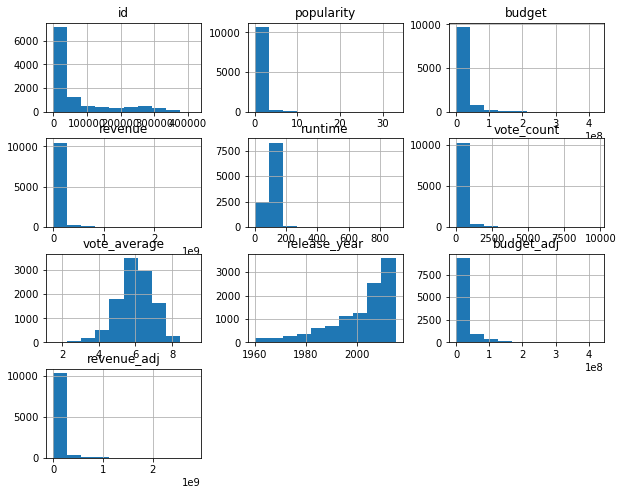

In [16]:
#Understanding the data

df.hist(figsize=(10,8))

##### Visualizing correllation of variables

In [17]:
df.corr().style.background_gradient(cmap="Blues")

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,1.000000,-0.014350,-0.141351,-0.099227,-0.088360,-0.035551,-0.058363,0.511364,-0.189015,-0.138477
popularity,-0.014350,1.000000,0.545472,0.663358,0.139033,0.800828,0.209511,0.089801,0.513550,0.609083
budget,-0.141351,0.545472,1.000000,0.734901,0.191283,0.632702,0.081014,0.115931,0.968963,0.622505
revenue,-0.099227,0.663358,0.734901,1.000000,0.162838,0.791175,0.172564,0.057048,0.706427,0.919110
runtime,-0.088360,0.139033,0.191283,0.162838,1.000000,0.163278,0.156835,-0.117204,0.221114,0.175676
vote_count,-0.035551,0.800828,0.632702,0.791175,0.163278,1.000000,0.253823,0.107948,0.587051,0.707942
vote_average,-0.058363,0.209511,0.081014,0.172564,0.156835,0.253823,1.000000,-0.117632,0.093039,0.193085
release_year,0.511364,0.089801,0.115931,0.057048,-0.117204,0.107948,-0.117632,1.000000,0.016793,-0.066256
budget_adj,-0.189015,0.513550,0.968963,0.706427,0.221114,0.587051,0.093039,0.016793,1.000000,0.646607
revenue_adj,-0.138477,0.609083,0.622505,0.919110,0.175676,0.707942,0.193085,-0.066256,0.646607,1.000000


### Research Question 1: Does a high budgeted movie lead to high revenue?)

The below scatterplots looks at the relationships between revenue and budget 

[Text(0.5, 1.0, 'Relationship between revenue and budget')]

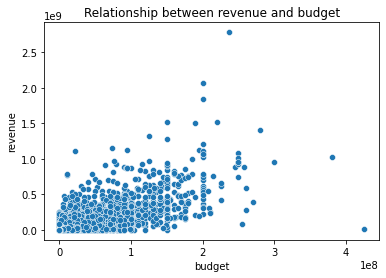

In [19]:
 #plotting scatterplot with seaborn using revenue
    
sns.scatterplot(x="budget", y="revenue", data=df).set(title='Relationship between revenue and budget')

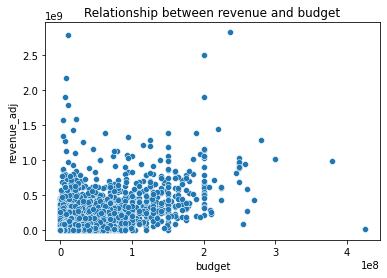

In [20]:
 #plotting scatterplot with seaborn using revenue_adj
    
sns.scatterplot(x="budget", y="revenue_adj", data=df).set(title='Relationship between revenue_adj and budget');

###### from the above scatter plor and correlation table, the correlation between budget and reveue, budget and revenue_adj is positive. It could be inferred that a high budget movie will likely bring in more revenue. Investors in the movie industry may likely want to budget a higher figure if they want increase revenue


### Research Question 2: Does a movie popularity level affect how much it is rated!

In [21]:
df["popularity"].describe()

count    10866.000000
mean         0.646441
std          1.000185
min          0.000065
25%          0.207583
50%          0.383856
75%          0.713817
max         32.985763
Name: popularity, dtype: float64

In [22]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [df["popularity"].min(), df.popularity.quantile(0.25),df["popularity"].median(), df.popularity.quantile(0.75), df["popularity"].max()] 

In [23]:
# Labels for the four popularity level groups
bin_names = ["Low" , "Medium", "Moderately High" ,  "High"]  

In [24]:
# Creates popularity_levels column
df['popularity_levels'] = pd.cut(df['popularity'], bin_edges, labels=bin_names)

# Checks for successful creation of this column
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,popularity_levels
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,High
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,High
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,High
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,High
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,High


In [25]:
#Does a moving rating influenced by it popularity levels?

df.groupby("popularity_levels").vote_average.mean()

popularity_levels
Low                5.900810
Medium             5.807474
Moderately High    5.910125
High               6.281156
Name: vote_average, dtype: float64

<AxesSubplot:title={'center':'Rating by Movie Popularity_levels'}, xlabel='Popularity_Levels', ylabel='Rating'>

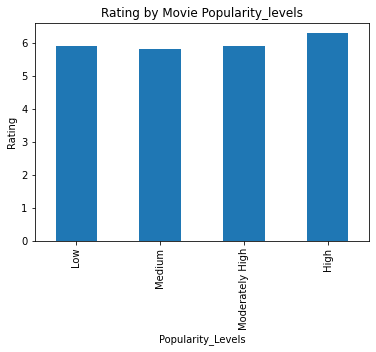

In [28]:
#What level of popularity receives the highest average rating? Visualization

df.groupby("popularity_levels").vote_average.mean().plot(kind="bar", title='Rating by Movie Popularity_levels', ylabel='Rating',
         xlabel='Popularity_Levels')

Plot to show if rating is depemded on the popularity of the movie

[Text(0.5, 1.0, 'Relationship between popularity and rating')]

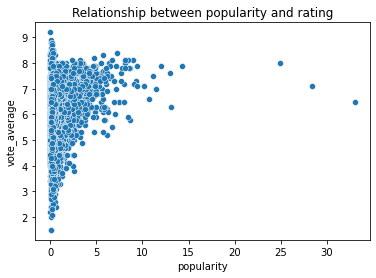

In [29]:
#Does popularity influence rating
#scatterplot

sns.scatterplot(x="popularity", y="vote_average", data=df).set(title='Relationship between popularity and rating')

##### Although, the correlation between popularity and rating is slightly postive. I observed from the bar-chart that excluding the outliers, the popularity of a movie have little or no influence on how the movie is rated in the industry. 

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.



### Research Question 3: Does a movie popularity level influence its total revenue?)

In [30]:
pop_rev = df.groupby("popularity_levels").revenue_adj.mean().to_frame().reset_index()

In [31]:
pop_rev

,popularity_levels,revenue_adj
0,Low,4.500185e+06
1,Medium,8.923387e+06
2,Moderately High,2.650891e+07
3,High,1.655019e+08


Plot to show the level of a movie popularity with the amount of revenue

Text(0, 0.5, 'Revenue')

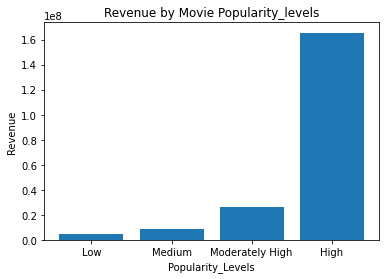

In [32]:
#What level of popularity receives the highest revenue? Visualization

plt.bar(pop_rev["popularity_levels"],pop_rev["revenue_adj"])
plt.title('Revenue by Movie Popularity_levels')
plt.xlabel('Popularity_Levels')
plt.ylabel('Revenue')

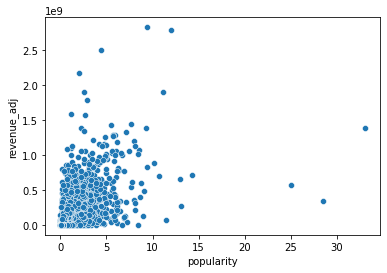

In [33]:
#Does popularity influence revenue
#scatterplot

sns.scatterplot(x="popularity", y="revenue_adj", data=df);

#### A popular movie is most likely going to make high revenue

### Research Question 4: What are the top 10 Highest Grossing movie by revenue?)

In [35]:
Top_10 = df.sort_values(["revenue_adj", "original_title"], axis=0, ascending=False).head(10) #sorting_values

In [36]:
#grouping and converting to dataframe

group_Top_10 = Top_10.loc[:,["revenue_adj","original_title"]].groupby("original_title").revenue_adj.sum().to_frame()


<AxesSubplot:title={'center':'Top_10 highest grossing movies by revenue'}, xlabel='Movie', ylabel='Revenue'>

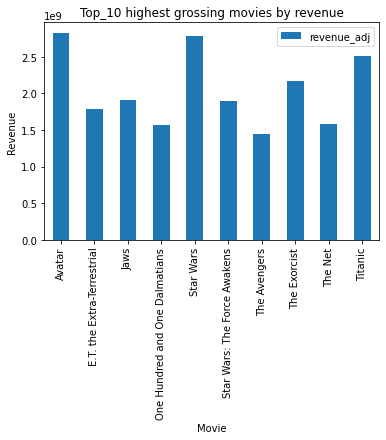

In [39]:
#Plot to show the highest grossing movie by revenue


group_Top_10.plot(kind="bar", title='Top_10 highest grossing movies by revenue', ylabel='Revenue', xlabel='Movie')

#### Avatar and Star wars are the top movies by revenue

### Research Question 5: What kinds of properties are associated with movies that have high revenues?)

In [40]:
Top_10.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10.000000,10.000000,1.000000e+01,1.000000e+01,10.000000,10.000000,10.000000,10.000000,1.000000e+01,1.000000e+01
mean,21024.100000,5.587987,9.195000e+07,1.201670e+09,131.000000,3720.700000,7.100000,1989.600000,1.097137e+08,2.049305e+09
std,42935.726425,4.096341,1.058643e+08,8.302542e+08,30.872498,3146.446251,0.618241,18.649993,1.029052e+08,5.048742e+08
min,11.000000,1.136610,4.000000e+06,2.158800e+08,79.000000,201.000000,5.600000,1961.000000,2.372625e+07,1.443191e+09
25%,598.000000,2.580390,8.625000e+06,5.468400e+08,116.500000,1188.500000,7.125000,1975.500000,2.975490e+07,1.635211e+09
50%,5597.000000,3.627887,1.650000e+07,9.495951e+08,123.000000,3129.000000,7.250000,1988.500000,3.943243e+07,1.904864e+09
75%,18053.750000,8.984018,2.000000e+08,1.763665e+09,141.250000,5132.500000,7.300000,2006.000000,2.027078e+08,2.421636e+09
max,140607.000000,12.037933,2.370000e+08,2.781506e+09,194.000000,8903.000000,7.900000,2015.000000,2.716921e+08,2.827124e+09


### Research Question 6: Who are the Top_10 Director with the highest revenue?)

In [41]:
df_top10_rev_director = df.groupby(['director'])['revenue_adj'].sum().sort_values(ascending=False).head(10)

df_top10_rev_director

director
Steven Spielberg    1.520245e+10
James Cameron       7.327221e+09
Peter Jackson       7.019848e+09
George Lucas        6.313919e+09
Robert Zemeckis     5.655648e+09
Michael Bay         5.460672e+09
Chris Columbus      5.094077e+09
Tim Burton          4.529285e+09
Ron Howard          4.527095e+09
Ridley Scott        4.219566e+09
Name: revenue_adj, dtype: float64

Plot to show the top 10 directors by revenue

<AxesSubplot:title={'center':'Top_10 directors by revenue'}, xlabel='Director', ylabel='Revenue_adj'>

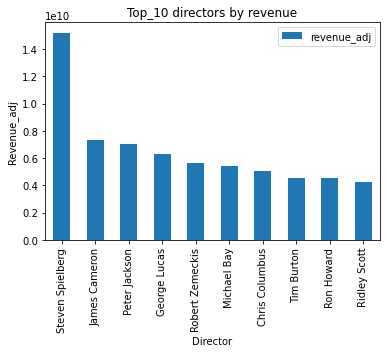

In [42]:
#Visualizing Top_10 Director with the highest revenue 

df_top10_rev_director.to_frame().plot(kind="bar", title='Top_10 directors by revenue', ylabel='Revenue_adj', xlabel='Director')

#### Steven Spielberg movies  seems to yield more revenue than those of other directors

### Research Question 7: Who are the Top_10 Director with the highest popularity?)

In [44]:
df_top10_popular_director = df.groupby(['director'])['popularity'].sum().sort_values(ascending=False).head(10) #grouping


In [45]:
df_top10_popular_director.to_frame(name="popularity").reset_index() #converting to dataframe

,director,popularity
0,Christopher Nolan,61.955206
1,Steven Spielberg,54.378995
2,Peter Jackson,49.067904
3,Ridley Scott,46.213770
4,Quentin Tarantino,46.059995
5,George Miller,35.600006
6,Tim Burton,34.648225
7,David Fincher,34.479784
8,Robert Zemeckis,33.619667
9,Colin Trevorrow,33.393773


Plot to show the top 10 directors by revenue

<AxesSubplot:title={'center':'Top_10 directors by popularity'}, xlabel='Directors', ylabel='Popularity'>

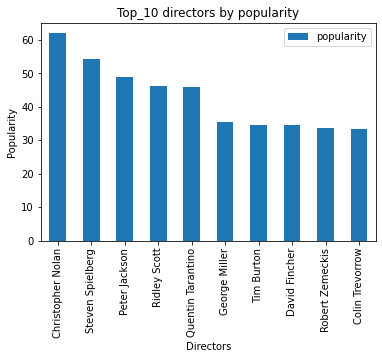

In [48]:
#Visualizing the Top_10 Director with the highest popularity

df_top10_popular_director.to_frame().plot(kind="bar",title='Top_10 directors by popularity', ylabel='Popularity', xlabel='Directors')

#### Christopher Nolan movies seems to be more popular than others

### Research Question 8: Which year has the highest Revenue?)

In [49]:
df_year_rev = df.groupby('release_year')['revenue'].sum().to_frame(name="revenue").reset_index() #grouping and formating to table


In [50]:
#Table showing the year with the highes movie revenue

Top_10_year = df_year_rev.sort_values(by = 'revenue', ascending = False).head(10)
Top_10_year

,release_year,revenue
55,2015,26762450518
53,2013,24703633017
52,2012,24668428824
54,2014,24331150183
51,2011,23695591578
49,2009,22180170559
50,2010,21959998545
48,2008,19431695138
47,2007,19411668670
44,2004,16793822618


The below plot shows the trend of movies revenue by year

[Text(0.5, 1.0, 'Revenue trend of movies by year')]

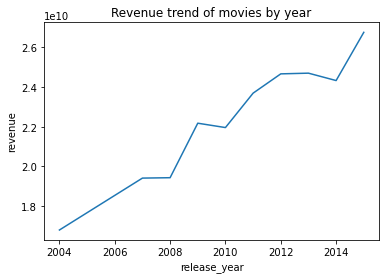

In [53]:
#Plot to show mive trends by revenue

sns.lineplot(x="release_year", y="revenue", data=Top_10_year).set(title='Revenue trend of movies by year')

<a id='conclusions'></a>
## Conclusions

> **1**: from the above scatter plot and correlation table, the correlation between budget and revenue_adj, budget and revenue_adj is positive. It could be inferred that a high budget movie will likely bring in more revenue. Investors in the movie industry may likely want to budget a higher figure if they want increase revenue

> **2**: Although, the correlation between popularity and rating is slightly positive. I observed from the bar-chart that excluding the outliers, the popularity of a movie has little or no influence on how the movie is rated in the industry.

> **3**: A popular movie is most likely going to make high revenue
> **4**: A popular movie is most likely going to make high revenue
> **5**: Steven Spielberg movies are seeming to yield more revenue than those of other directors
> **6**: Christopher Nolan movies seems to be more popular than others

### Limitations
> **1**: The final cost of making a movie was not given

> **2**: Social meedia comments or ratings were not given

> **3**: Details of the rating column was not given



### References


> **1**: https://www.geeksforgeeks.org/pandas-cut-method-in-python/

> **2**: https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata

> **3**: https://www.statology.org/pandas-groupby-bar-plot/

> **4**: https://www.geeksforgeeks.org/python-pandas-dataframe-sort_values-set-1/

> **5**: https://realpython.com/pandas-sort-python/

> **6**: https://stackoverflow.com/questions/39581893/pandas-find-percentile-stats-of-a-given-column

> **7**: https://www.sfu.ca/~mjbrydon/tutorials/BAinPy/03_visualization.html

> **8**: https://www.statology.org/pandas-split-column/

> **9**: https://sparkbyexamples.com/pandas/pandas-groupby-sort-within-groups/

> **10**: https://www.statology.org/pandas-groupby-correlation/

> **11**: https://www.easytweaks.com/pandas-groupby-to-dataframe/
